Leaky-integrate-and-fire model

Neuronal dynamics can be conceived as a summation process combined with an action potential triggering mechanism. This mechanism triggers an action potential, or spike, when the neuron reaches a critical voltage, 
ϑ. In this first exercise, I explored the dynamics of the leaky integrate and fire (LIF) model. This model reduces spikes to 'events'; action potentials have roughly the same form, and hence information is transferred in the presence or absence of a spike. No attempts will be made to describe the shape of the action potential.

We can thus reduce the model to 

1. a linear differential equation which describes the evolution of the membrane potential 
2. a threshold for spiking.

In order to obtain an equation which links the momentary voltage ui(t) - urest of neuron i to the input current I(t), we can regard the neuron as an electrical circuit. If a short current pulse I(t) is injected into the neuron, the additional electrical charge will charge the cell membrane. The cell membrane therefore acts like a capacitor of capacity C. Because the insulator is not perfect, the charge will, over time, slowly leak through the cell membrane. The cell membrane can therefore be characterized by a finite leak resistance R.

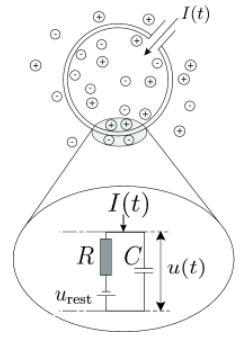

Eventually, this leads to the following equation:

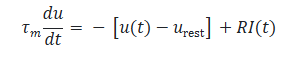

Where tau_m is the membrane time constant, u(t) is the membrane potential at time t, u_rest is the membrane potential at rest, R is the membrane resistance and I(t) is the input current at time t.

Furthermore, the membrane potential is reset after each output spike:

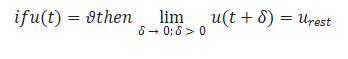

nr of spikes: 0


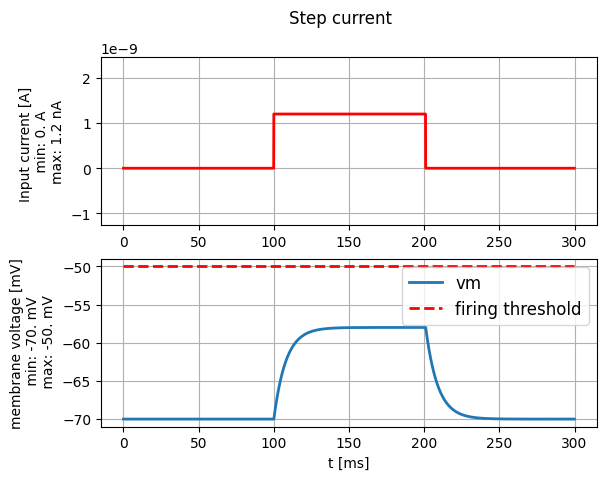

nr of spikes: 5


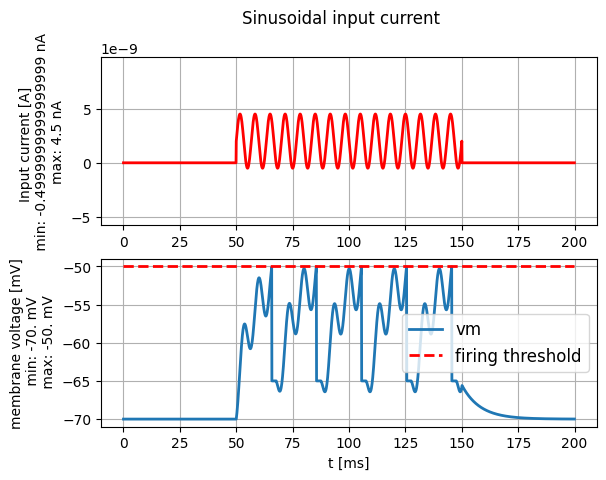

Resting potential: -70. mV
Reset voltage: -65. mV
Firing threshold: -50. mV
Membrane resistance: 10. Mohm
Membrane time-scale: 8. ms
Absolute refractory period: 2. ms


In [7]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=30)
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

LIF.getting_started()
LIF.print_default_parameters()


In the absence of an input current, a LIF neuron has a constant membrane voltage V_REST. If an input current drives vm above the firing threshold, a spike is generated. Then, vm is reset to V_RESET and the neuron ignores any input during the refractory period.

1.1.1. Question: minimal current (calculation)

For the default neuron parameters (see above), compute the minimal amplitude Imin of a step current to elicitate a spike.

In [8]:
from neurodynex3.leaky_integrate_and_fire import LIF
print("resting potential: {}".format(LIF.V_REST))

resting potential: -70. mV


In [9]:
print('Resting potential: {}'.format(LIF.V_REST))
print('Firing threshold: {}'.format(LIF.FIRING_THRESHOLD))
print('Membrane resistance: {}'.format(LIF.MEMBRANE_RESISTANCE))
i_min = (LIF.FIRING_THRESHOLD - LIF.V_REST) / LIF.MEMBRANE_RESISTANCE
print('The minimal current for firing is: {}'.format(i_min))

Resting potential: -70. mV
Firing threshold: -50. mV
Membrane resistance: 10. Mohm
The minimal current for firing is: 2.0000000000000004 nA


1.1.2. Question: minimal current (simulation)

Use the value Imin you’ve computed and verify your result: inject a step current of amplitude Imin for 100ms into the LIF neuron and plot the membrane voltage. vm should approach the firing threshold but not fire.

nr of spikes: 0


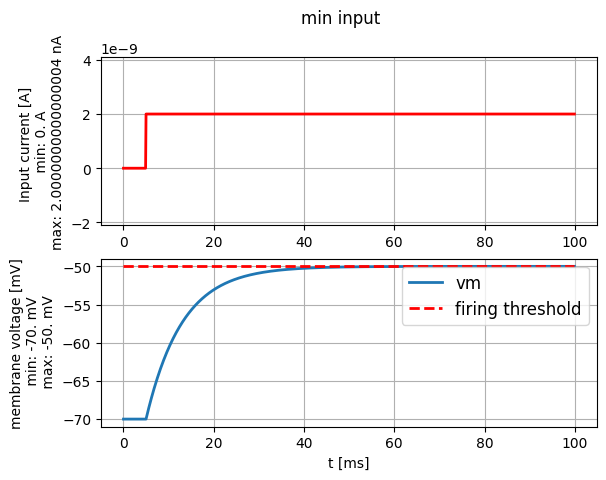

In [10]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory

# create a step current with amplitude = I_min
# This function creates a step current
# We create the step current with an amplitude of I_min
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=b2.ms,
    amplitude=I_min)  # set I_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

Clearly, we see that vm approaches the firing threshold, but does not fire.

1.2 Exercise: f-I Curve

For a constant input current I, an LIF neuron fires regularly with a firing frequency of f. If the current is too small (I is smaller than Imin) f is 0Hz; for larger I the rate increases. A neuron’s firing-rate versus input-amplitude relationship is visualized in an “f-I curve”.

1.2.1. Question: f-I Curve and refractoriness

We now study the f-I curve for a neuron with a refractory period of 3ms.

Inject currents of different amplitudes (from 0nA to 100nA) into a LIF neuron. For each current, run the simulation for 500ms and determine the firing frequency in Hz. Then plot the f-I curve. Pay attention to the low input current.

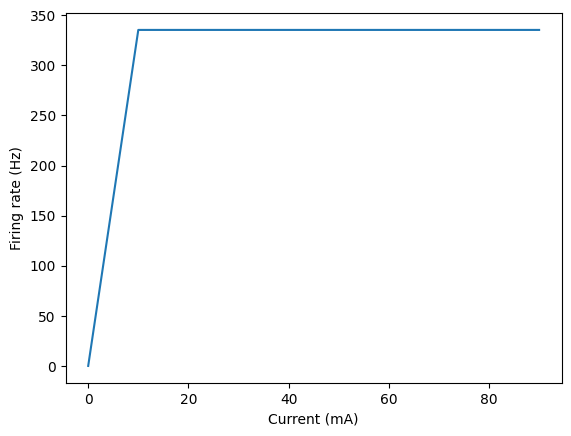

In [11]:
current_amp_list = np.arange(0, 100, 10) 
firing_rate_record = list()
refractory_period = 3 * b2.ms

for current_amp in current_amp_list:
    step_current = input_factory.get_step_current(
               t_start=10, t_end=490, unit_time=b2.ms,
               amplitude = current_amp * b2.mA
               )
    
    (state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(
                                 input_current=step_current,
                                 simulation_time=500 * b2.ms,
    abs_refractory_period = refractory_period
                                 )

    spike_count = spike_monitor.count[0]

    firing_rate = spike_count / (480 * 10**-3) # current injected for 95ms
    firing_rate_record.append(firing_rate)

plt.figure()
plt.plot(current_amp_list, firing_rate_record)
plt.xlabel('Current (mA)')
plt.ylabel('Firing rate (Hz)')
plt.show()

This f-I curve shows that firing frequency increases linearly with the input current amplitude. However, beyond a certain current the firing rate plateaus as the maximum firing rate is reached, limited by the refractory period.

1.3. Exercise: “Experimentally” estimate the parameters of a LIF neuron

A LIF neuron is determined by the following parameters: Resting potential, reset voltage, firing threshold, membrane resistance, membrane time-scale, absolute refractory period. By injecting a known test current into a LIF neuron (with unknown parameters), you can determine the neuron properties from the voltage response.

1.3.1. Question: “Read” the LIF parameters out of the vm plot

1. Get a random parameter set.
2. Create an input current of your choice.
3. Simulate the LIF neuron using the random parameters and your test-current Note that the simulation runs for a fixed duration of 50ms.
4. Plot the membrane voltage and estimate the parameters. You do not have to write code to analyse the voltage data in the StateMonitor. Simply estimate the values from the plot. For the membrane resistance and the membrane time-scale you might have to change your current.
5. Compare your estimates with the true values.

Resting potential: -60. mV
Reset voltage: -68. mV
Firing threshold: -16. mV
Membrane resistance: 9. Mohm
Membrane time-scale: 24. ms
Absolute refractory period: 2. ms


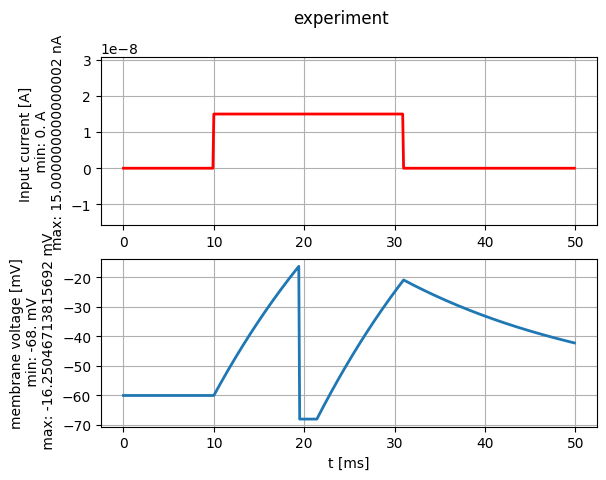

In [12]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=10, t_end=30, unit_time=b2.ms, amplitude= 15 * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

# print the parameters to the console and compare with your estimates
LIF.print_obfuscated_parameters(random_parameters)

I found the reset voltage by taking the minimum of the graph:

In [13]:
print('Reset voltage:', min(state_monitor.v[0]))

Reset voltage: -68. mV


I found the resting potential by taking the membrane potential around 8 ms (when at rest). 

In [14]:
state_monitor.t
indexOfInterest = np.where(state_monitor.t == 8* b2.msecond)[0]
print('Resting potential:', state_monitor.v[0][indexOfInterest])

Resting potential: [-60.] mV


This gave me a correct reset potential of -60 mV.

I estimated the refractory period with the graph. I increased the input current to 50 nA to obtain repetitive firing.

Resting potential: -69. mV
Reset voltage: -64. mV
Firing threshold: -36. mV
Membrane resistance: 2. Mohm
Membrane time-scale: 17. ms
Absolute refractory period: 5. ms


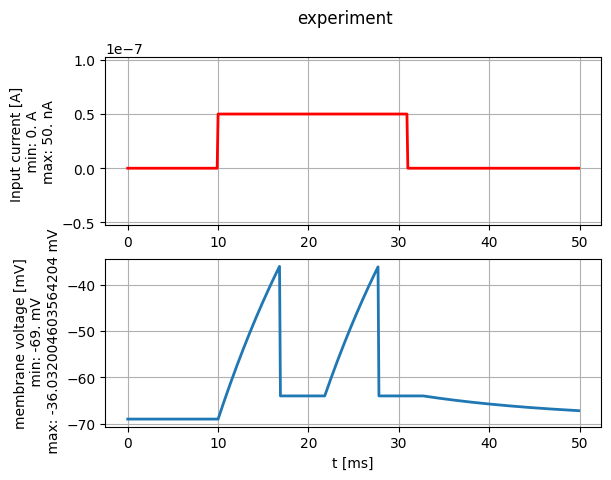

In [15]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=433)

# define your test current
test_current = input_factory.get_step_current(
    t_start=10, t_end=30, unit_time=b2.ms, amplitude= 50 * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

# print the parameters to the console and compare with your estimates
LIF.print_obfuscated_parameters(random_parameters)

I found the resting potential by taking the minimum of the graph:

In [16]:
print('Resting potential:', min(state_monitor.v[0]))

Resting potential: -69. mV


The reset potential is the membrane potential to which the neuron resets immediately after a spike. To obtain this, I took the membrane potential around 20 ms (during the reset potential):

In [17]:
state_monitor.t
indexOfInterest = np.where(state_monitor.t == 21.1 * b2.msecond)[0] # 30 ms
print('Reset potential:', state_monitor.v[0][indexOfInterest])

Reset potential: [-64.] mV


Next, the membrane resistance can be obtained with Ohm's law:

Delta_V = I \ c * R_m,

However, there is a problem: the neuron will spike upon reaching its firing threshold. Because of this, the neuron will not reach a plateau. It is then possible that the membrane potential is reset before reaching the maximum voltage. One way to fix this is to saturate the neuron with a small current. This way, the maximum neuron potential is below the firing threshold. Hence, I set the input current to 1 nA and simulated for long enough to allow the neuron to saturate.

(<Axes: ylabel='Input current [A] \n min: 0. A \nmax: 1. nA'>,
 <Axes: xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -69. mV\n max: -67.17931387352394 mV'>)

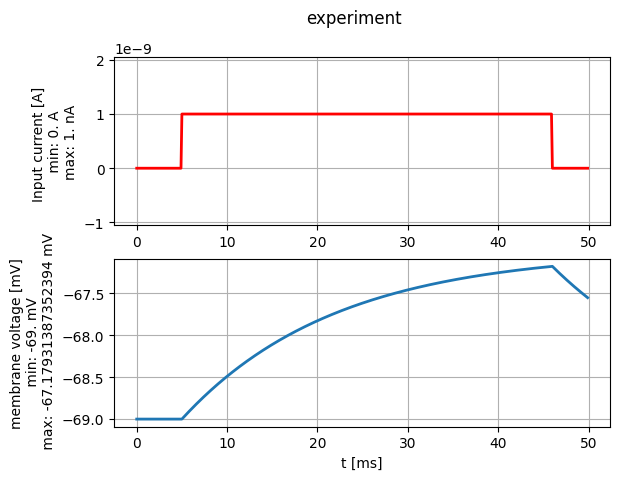

In [18]:
# get random parameter
random_parameters = LIF.get_random_param_set(random_seed=433)

# define test current 
test_current = input_factory.get_step_current(
t_start=5, t_end=45, unit_time=b2.ms, amplitude=1*b2.namp)

# probe the neuron. pass the test current AND the random parames to the function 
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot 
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title='experiment')


Then, I calculated the membrane resistance as follows:

In [19]:
# Ohm's Law

max_v = np.max(state_monitor.v[0]) 
reset_v = np.min(state_monitor.v[0])

input_current = 1 * b2.nA 
delta_v = (max_v) - (reset_v)  
R = delta_v / input_current 

print("Membrane resistance: %.2f MΩ" % (R / b2.Mohm))

Membrane resistance: 1.82 MΩ


Next, I estimated the membrane time constant by substituting it into the equation of the passive membrane model.

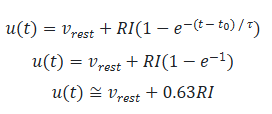

I obtained: v(t) = -69 mV + 0.63 * 1.82 MΩ * 1 nA = -67.85 mV

This gave me the target membrane voltage which I then used to find the time where state_monitor.v[0] == v_t aka the time constant.

In [20]:
rest_v = -69
max_v = -67.18
delta_v = max_v - rest_v
v_t = rest_v + 0.63 * delta_v
print('Target v_t: %.2f mV' % v_t)

v_t_index = np.where(np.round(state_monitor.v[0], 4) == np.round(v_t, 1) * b2.mV)

tau = state_monitor.t[v_t_index[0][0]] # pick the first match

print('Time constant:', tau)

Target v_t: -67.85 mV
Time constant: 17.7 ms


Finally, I obtained the firing threshold by estimating the maximum membrane voltage before it drops. 

In [21]:
print('Firing threshold:', max(state_monitor.v[0]))

Firing threshold: -67.17931387352394 mV


1.4 Sinusoidal input current and subthreshold response

In the subthreshold regime (no spike), the LIF neuron is a linear system and the membrane voltage is a filtered version of the input current. In this exercise we study the properties of this linear system when it gets a sinusoidal stimulus.

Create a sinusoidal input current (see example below) and inject it into the LIF neuron. 

nr of spikes: 0


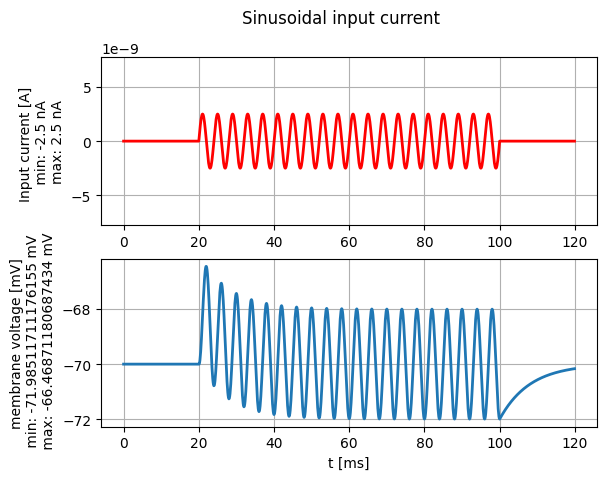

In [22]:

sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 2.5 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))



For input frequencies between 10Hz and 1 kHz, plot the resulting amplitude of subthreshold oscillations of the membrane potential vs. input frequency.

To do this, I first detected the positive and negative peaks. Then, I could calculate the amplitude by taking the difference between the positive and negative peaks. I then used mode() to find the most common oscillation amplitude. 

Next, I defined the input frequency range by simulating the LIF model for each frequency. Using my find_sinusoid_amplitude function i then computed the oscillation amplitude of the membrane potential and stored them in oscillation_amp_list. 



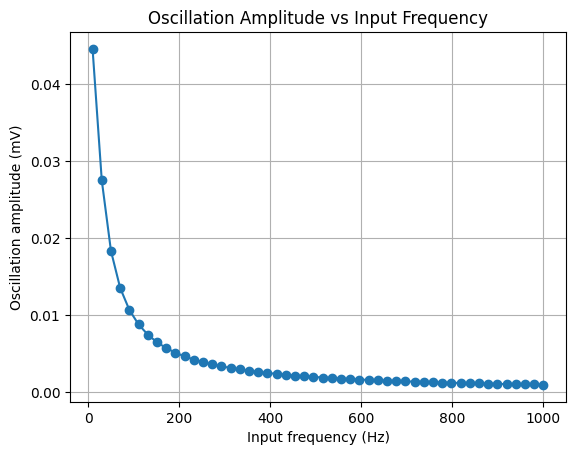

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks  
from scipy.stats import mode
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory

def find_sinusoid_amplitude(sinusoid_signal):
    positive_peaks_loc = find_peaks(sinusoid_signal)[0]  
    positive_peaks_val = sinusoid_signal[positive_peaks_loc]

    negative_peaks_loc = find_peaks(-sinusoid_signal)[0]  
    negative_peaks_val = sinusoid_signal[negative_peaks_loc]
    
    min_length = min(len(positive_peaks_val), len(negative_peaks_val))
    positive_peaks_val = positive_peaks_val[:min_length]
    negative_peaks_val = negative_peaks_val[:min_length]

    amplitude = positive_peaks_val - negative_peaks_val
    amplitude_mode = mode(np.round(amplitude, 5), keepdims=True)
    return amplitude_mode.mode[0]

input_frequency_list = np.linspace(10, 1000, 50)
oscillation_amp_list = []

for freq in input_frequency_list:
    sinusoidal_current = input_factory.get_sinusoidal_current(
        t_start=200,   
        t_end=1000,    
        unit_time=0.1 * b2.ms,  
        amplitude=2.5 * b2.namp, 
        frequency=freq * b2.Hz,
        direct_current=0. * b2.namp
    )

    state_monitor, _ = LIF.simulate_LIF_neuron(
        input_current=sinusoidal_current, 
        simulation_time=120 * b2.ms, 
        firing_threshold=0 * b2.mV
    )
    
    sinusoid_amp = find_sinusoid_amplitude(state_monitor.v[0])
    oscillation_amp_list.append(sinusoid_amp)

plt.figure()
plt.plot(input_frequency_list, oscillation_amp_list, marker='o')
plt.xlabel('Input frequency (Hz)')
plt.ylabel('Oscillation amplitude (mV)')
plt.title('Oscillation Amplitude vs Input Frequency')
plt.grid(True)
plt.show()


For input frequencies between 10 Hz and 1 kHz, plot the resulting phase shift of subthreshold oscillations of the membrane potential vs. input frequency. 



For this question, I consulted https://stackoverflow.com/questions/4688715/find-time-shift-between-two-similar-waveforms#4690225 as I was not too sure how to solve this issue by myself. Finally I came to the following solution:


Detected Phase Gap: 4.00


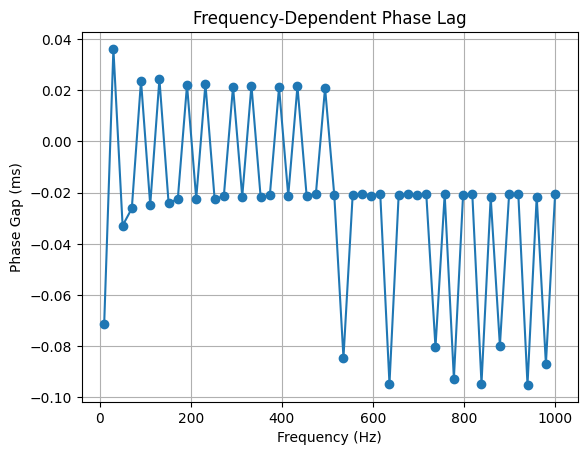

In [24]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory

def measure_phase_gap(seq1, seq2):
    peak_index = np.argmax(signal.correlate(seq2, seq1))
    return peak_index - (len(seq1) - 1)

wave_a = np.array([0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0, 0, 0, 0, 0])
wave_b = np.array([0, 0, 0, 0, 0, 1, 2, 3, 4, 3, 2, 1, 0, 1, 2, 3, 4, 3, 2, 1, 0])

print('Detected Phase Gap: %.2f' % measure_phase_gap(wave_a, wave_b))

freq_steps = np.linspace(10, 1000, 50)
phase_gaps = []

for f in freq_steps:
    modulated_input = input_factory.get_sinusoidal_current(
        t_start=200, t_end=1000, unit_time=0.1 * b2.ms,
        amplitude=2.5 * b2.namp, frequency=f * b2.Hz,
        direct_current=0. * b2.namp
    )

    neuron_activity, _ = LIF.simulate_LIF_neuron(
        input_current=modulated_input,
        simulation_time=120 * b2.ms,
        firing_threshold=0 * b2.mV
    )

    raw_input = np.squeeze(np.asarray(modulated_input.values))
    response_signal = np.asarray(neuron_activity.v[0])

    phase_lag = measure_phase_gap(raw_input, response_signal)
    phase_gaps.append(phase_lag * 0.1 * b2.ms)

plt.figure()
plt.plot(freq_steps, phase_gaps, marker='o')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase Gap (ms)')
plt.title('Frequency-Dependent Phase Lag')
plt.grid(True)
plt.show()
